In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_colwidth',500)

In [55]:
df = pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,timestamp,source,text,rating_numerator,dog_stage,jpg_url,dog_breed,prediction_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,41,111
2093,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,147,311
2094,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,47,128
2095,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,48,132


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   timestamp              2097 non-null   object 
 2   source                 2097 non-null   object 
 3   text                   2097 non-null   object 
 4   rating_numerator       2097 non-null   float64
 5   dog_stage              336 non-null    object 
 6   jpg_url                1971 non-null   object 
 7   dog_breed              1971 non-null   object 
 8   prediction_confidence  1971 non-null   float64
 9   retweet_count          2097 non-null   int64  
 10  favorite_count         2097 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 180.3+ KB


In [57]:
df.describe()

,tweet_id,rating_numerator,prediction_confidence,retweet_count,favorite_count
count,2.097000e+03,2097.000000,1971.000000,2097.000000,2097.000000
mean,7.365594e+17,12.147725,0.466219,2841.667620,8980.902241
std,6.710178e+16,40.338978,0.339608,4709.238203,12199.636684
min,6.660209e+17,0.000000,0.000000,16.000000,81.000000
25%,6.768197e+17,10.000000,0.140969,644.000000,2046.000000
50%,7.098528e+17,11.000000,0.461076,1405.000000,4196.000000
75%,7.877176e+17,12.000000,0.777087,3285.000000,11416.000000
max,8.924206e+17,1776.000000,0.999956,79515.000000,132810.000000


In [58]:
df['rating_numerator'].value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
11.27        1
9.75         1
88.00        1
144.00       1
11.26        1
121.00       1
44.00        1
60.00        1
45.00        1
80.00        1
99.00        1
50.00        1
204.00       1
1776.00      1
165.00       1
13.50        1
0.00         1
84.00        1
24.00        1
420.00       1
Name: rating_numerator, dtype: int64

In [59]:
#making a copy of my df 
df1 = df.copy()

In [60]:
#dropping column timestamp as i do not intend to use it
df1.drop('timestamp',axis=1,inplace=True)

In [61]:
df1

,tweet_id,source,text,rating_numerator,dog_stage,jpg_url,dog_breed,prediction_confidence,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000,8853,39467
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,41,111
2093,666044226329800704,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,147,311
2094,666033412701032449,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,47,128
2095,666029285002620928,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,48,132


In [62]:
#Grouping the ratings into low,medium,high and too high
bins = [0,6,10,15,165]
labels = ['low','medium','high','too_high']

df1['rating_group'] = pd.cut(df1['rating_numerator'],bins=bins,labels=labels,right=False)


In [63]:
df1['rating_group'].value_counts()

high        1663
medium       336
low           83
too_high      11
Name: rating_group, dtype: int64

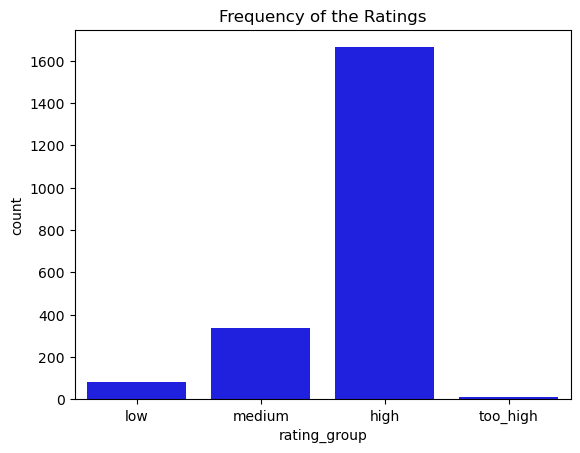

In [64]:
sb.countplot(data=df1,x='rating_group',color='b')
plt.title('Frequency of the Ratings');

In [65]:
df1['dog_breed'].value_counts().head(20)

None                         305
golden_retriever             156
Labrador_retriever           106
Pembroke                      94
Chihuahua                     90
pug                           62
toy_poodle                    50
chow                          48
Samoyed                       42
Pomeranian                    41
malamute                      33
Chesapeake_Bay_retriever      31
French_bulldog                31
cocker_spaniel                30
miniature_pinscher            24
Eskimo_dog                    22
German_shepherd               21
Cardigan                      21
Staffordshire_bullterrier     20
Siberian_husky                20
Name: dog_breed, dtype: int64

In [66]:
df1['dog_breed']

0                         None
1                    Chihuahua
2                    Chihuahua
3           Labrador_retriever
4                       basset
                 ...          
2092        miniature_pinscher
2093       Rhodesian_ridgeback
2094           German_shepherd
2095                   redbone
2096    Welsh_springer_spaniel
Name: dog_breed, Length: 2097, dtype: object

In [67]:
sum(df1['dog_breed'].isnull())

126

In [68]:
df1[df1['dog_breed'].isnull()]

,tweet_id,source,text,rating_numerator,dog_stage,jpg_url,dog_breed,prediction_confidence,retweet_count,favorite_count,rating_group
32,885518971528720385,Twitter for iPhone,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,14.0,NaN,NaN,NaN,NaN,3899,20788,high
38,884247878851493888,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,13.0,NaN,NaN,NaN,NaN,21298,74423,high
65,878604707211726852,Twitter for iPhone,Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,13.0,NaN,NaN,NaN,NaN,7582,30931,high
73,876537666061221889,Twitter for iPhone,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,14.0,NaN,NaN,NaN,NaN,4800,23869,high
78,875097192612077568,Twitter for iPhone,You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,13.0,NaN,NaN,NaN,NaN,6342,27997,high
...,...,...,...,...,...,...,...,...,...,...,...
1568,676916996760600576,Vine - Make a Scene,Super speedy pupper. Does not go gentle into that goodnight. 10/10 https://t.co/uPXBXS1XNb,10.0,pupper,NaN,NaN,NaN,2002,3231,high
1579,676593408224403456,Vine - Make a Scene,This pupper loves leaves. 11/10 for committed leaf lover https://t.co/APvLqbEhkF,11.0,pupper,NaN,NaN,NaN,2410,4954,high
1594,676121918416756736,Vine - Make a Scene,Here we are witnessing a very excited dog. Clearly has no control over neck movements. 8/10 would still pet https://t.co/ICNIjSkrXs,8.0,NaN,NaN,NaN,NaN,1297,2335,medium
1666,674307341513269249,Vine - Make a Scene,This is life-changing. 12/10 https://t.co/SroTpI6psB,12.0,NaN,NaN,NaN,NaN,7641,12129,high


In [69]:
df1[df1['dog_breed'] == 'None']

,tweet_id,source,text,rating_numerator,dog_stage,jpg_url,dog_breed,prediction_confidence,retweet_count,favorite_count,rating_group
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.0,8853,39467,high
21,887517139158093824,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14.0,NaN,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,None,0.0,12082,46959,high
27,886680336477933568,Twitter for iPhone,This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,13.0,NaN,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,None,0.0,4610,22798,high
52,881268444196462592,Twitter for iPhone,Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,12.0,NaN,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,None,0.0,5358,23501,high
53,880935762899988482,Twitter for iPhone,This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,13.0,NaN,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,None,0.0,2886,17346,high
...,...,...,...,...,...,...,...,...,...,...,...
2071,666362758909284353,Twitter for iPhone,Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM,6.0,NaN,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,None,0.0,595,804,medium
2075,666293911632134144,Twitter for iPhone,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,3.0,NaN,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,None,0.0,368,522,low
2078,666268910803644416,Twitter for iPhone,Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,10.0,NaN,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,None,0.0,37,108,high
2079,666104133288665088,Twitter for iPhone,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,1.0,NaN,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,None,0.0,6871,14765,low


In [70]:
#Some of the dog breeds with none either have an unclear picture of the dog for the algorithm to pick or they are not dogs
#creating a dataframe to exclude the 'none' dog breeds
not_none_breed = df1[df1['dog_breed'] != 'None']
not_none_breed

,tweet_id,source,text,rating_numerator,dog_stage,jpg_url,dog_breed,prediction_confidence,retweet_count,favorite_count,rating_group
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819,high
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461,high
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908,high
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048,high
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562,high
...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,41,111,low
2093,666044226329800704,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,147,311,medium
2094,666033412701032449,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,47,128,medium
2095,666029285002620928,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,48,132,medium


## What are the most common breeds?

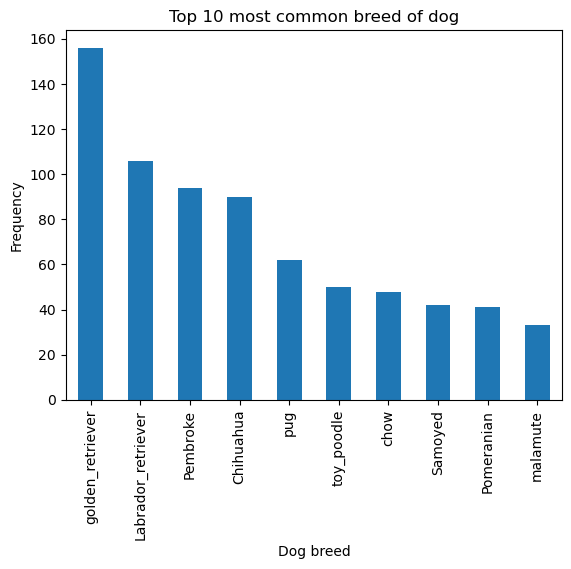

In [71]:
## What are the most common breeds?
not_none_breed['dog_breed'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 most common breed of dog')
plt.xlabel('Dog breed')
plt.ylabel('Frequency');

#### The golden retriever was the most common dog predicted by the algorithm

## Which dog breeds have high rating?

In [72]:
not_none_breed['rating_numerator'].value_counts()

12.00     461
10.00     377
11.00     373
13.00     255
9.00      135
8.00       71
7.00       32
14.00      26
6.00       16
5.00       14
4.00        7
3.00        5
2.00        2
80.00       1
88.00       1
144.00      1
11.26       1
121.00      1
44.00       1
60.00       1
45.00       1
0.00        1
99.00       1
50.00       1
165.00      1
13.50       1
11.27       1
9.75        1
24.00       1
84.00       1
1.00        1
Name: rating_numerator, dtype: int64

In [73]:
not_none_breed['rating_numerator'].describe()

count    1792.000000
mean       11.358694
std         7.053849
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       165.000000
Name: rating_numerator, dtype: float64

In [74]:
not_none_breed['rating_group'].value_counts()

high        1495
medium       255
low           30
too_high      11
Name: rating_group, dtype: int64

In [75]:
not_none_breed.groupby(['rating_group'])['dog_breed'].value_counts().groupby(level=0).nlargest(3)

rating_group  rating_group  dog_breed                  
low           low           Chihuahua                        3
                            miniature_pinscher               3
                            soft-coated_wheaten_terrier      3
medium        medium        Chihuahua                       19
                            pug                             15
                            Labrador_retriever               9
high          high          golden_retriever               145
                            Labrador_retriever              94
                            Pembroke                        88
too_high      too_high      Labrador_retriever               2
                            golden_retriever                 2
                            soft-coated_wheaten_terrier      2
Name: dog_breed, dtype: int64

#### The Golden_retriever is the dog breed with the highest rating
##### The labrador_retriever comes after it
##### Both breeds have the highest frequency in the dataset

## What dog stage was the most frequent and has the highest rating?

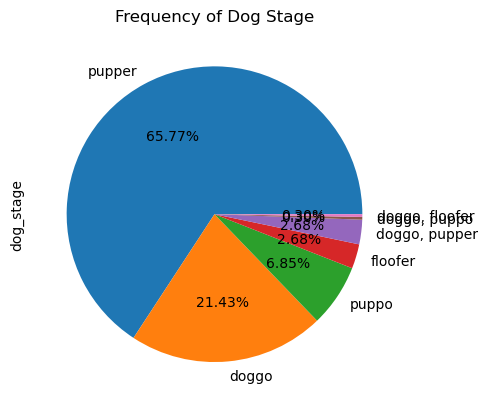

In [76]:
def pie_chart(x,title):
    data = df1[x].value_counts()
    labels = data.index
    data.plot(kind='pie', labels=labels, autopct='%1.2f%%')
    plt.title(title);

pie_chart('dog_stage','Frequency of Dog Stage')

In [77]:
df1.groupby(['dog_stage'])['rating_group'].value_counts()

dog_stage               
doggo           high         69
                medium        3
                low           0
                too_high      0
doggo, floofer  high          1
                low           0
                medium        0
                too_high      0
doggo, pupper   high          8
                low           1
                medium        0
                too_high      0
doggo, puppo    high          1
                low           0
                medium        0
                too_high      0
floofer         high          9
                low           0
                medium        0
                too_high      0
pupper          high        182
                medium       37
                low           2
                too_high      0
puppo           high         22
                medium        1
                low           0
                too_high      0
Name: rating_group, dtype: int64

In [78]:
df1.groupby('dog_stage')['rating_group'].value_counts().nlargest(5)

dog_stage        
pupper     high      182
doggo      high       69
pupper     medium     37
puppo      high       22
floofer    high        9
Name: rating_group, dtype: int64

##### The pupper dog stage has the highest rating 

## What was the source of most tweets?

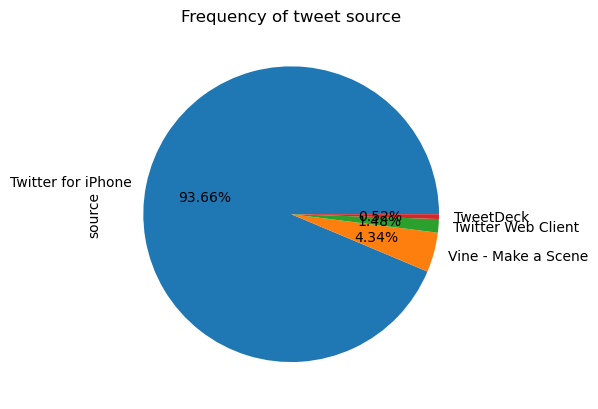

In [79]:
pie_chart('source','Frequency of tweet source')

##### Most of the tweets came from an iphone

## Checking the accuracy of the prediction algorithm

In [80]:
not_none_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2096
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               1792 non-null   int64   
 1   source                 1792 non-null   object  
 2   text                   1792 non-null   object  
 3   rating_numerator       1792 non-null   float64 
 4   dog_stage              290 non-null    object  
 5   jpg_url                1666 non-null   object  
 6   dog_breed              1666 non-null   object  
 7   prediction_confidence  1666 non-null   float64 
 8   retweet_count          1792 non-null   int64   
 9   favorite_count         1792 non-null   int64   
 10  rating_group           1791 non-null   category
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 155.9+ KB


In [81]:
#Using dataset where the breed's are not none which s the same as dataset where the prediction confidence is equal to 0
not_none_breed['prediction_confidence'].describe()


count    1666.000000
mean        0.551571
std         0.298923
min         0.000010
25%         0.305955
50%         0.550914
75%         0.822939
max         0.999956
Name: prediction_confidence, dtype: float64

In [82]:
bins = [0,0.305955,0.550914,0.822939,0.999956]
labels = ['very_low','low','medium','high']

not_none_breed['prediction_class'] = pd.cut(not_none_breed['prediction_confidence'],labels=labels,bins=bins)

C:\Users\ABDULWAHAB\AppData\Local\Temp\ipykernel_816\1501587161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_none_breed['prediction_class'] = pd.cut(not_none_breed['prediction_confidence'],labels=labels,bins=bins)


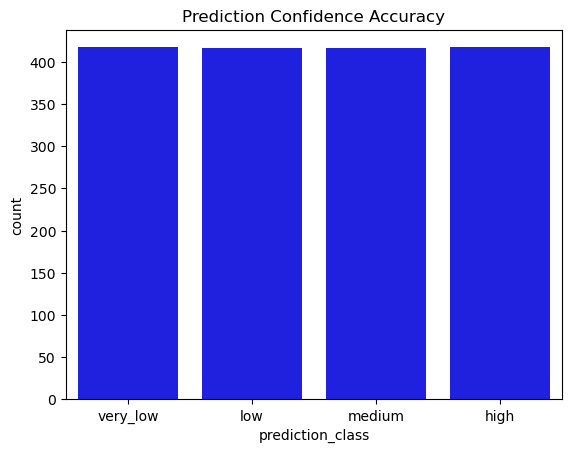

In [83]:
sb.countplot(data = not_none_breed, x='prediction_class',color='b')
plt.title('Prediction Confidence Accuracy');


In [84]:
## The prediction confidence of all the classes has virtually the same count
### This brings doubt about the accuracy of the algorithm

### Comparing the rating group to the retweet and favorite count

<AxesSubplot:xlabel='favorite_count', ylabel='rating_group'>

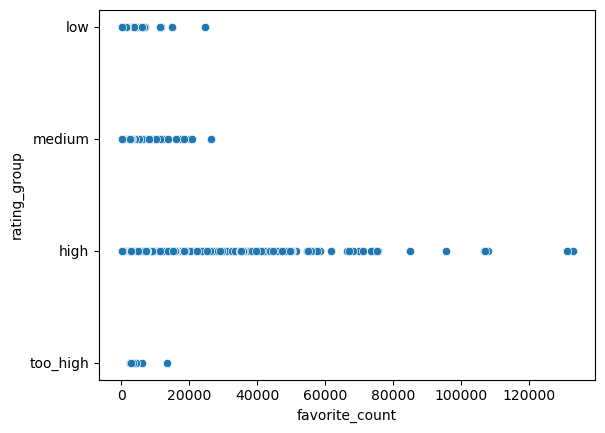

In [85]:
sb.scatterplot(data=df1,x='favorite_count',y='rating_group')

# 

<AxesSubplot:xlabel='retweet_count', ylabel='rating_group'>

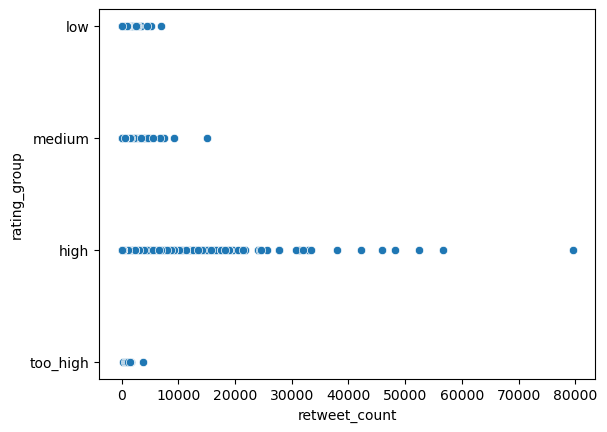

In [86]:
sb.scatterplot(data=df1,x='retweet_count',y='rating_group')

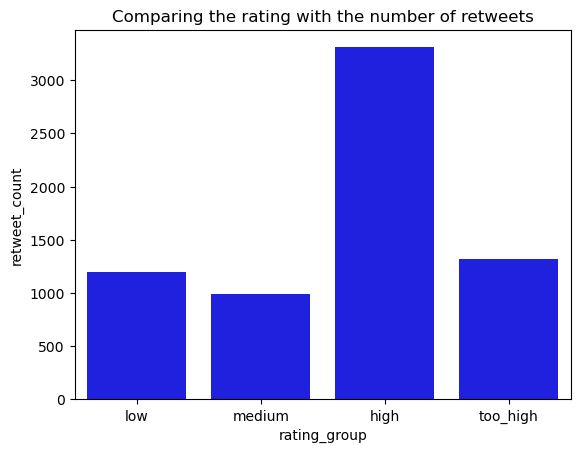

In [87]:
sb.barplot(data=df1,y='retweet_count',x='rating_group',color='b',ci=None)
plt.title('Comparing the rating with the number of retweets');

In [88]:
## We can see that the rating has a not bad correspondence to the retweet counts
### This shows that the ratings of the twiiter user WeRateDogs can be trusted

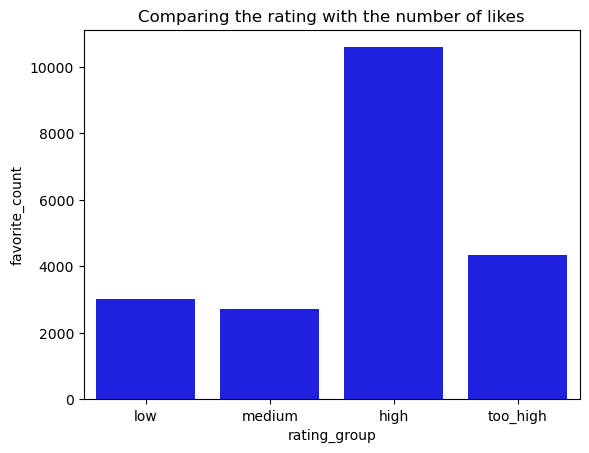

In [89]:
sb.barplot(data=df1,y='favorite_count',x='rating_group',color='b',ci=None)
plt.title('Comparing the rating with the number of likes');
#error bars to show the confidence interval:

In [90]:
## We can see that the rating has a not bad correspondence to the favorite counts
### This shows that the ratings of the twiiter user WeRateDogs can be trusted